# 👓 Time Series Plotting With yfinance

#### » Import yfinance library and download historical stock data for Apple (AAPL)

In [1]:
import yfinance as yf
df = yf.download("AAPL", start="2020-01-01", end="2025-01-01", auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


#### » Preview the DataFrame

In [2]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.538521,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,71.833290,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.405670,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.065147,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.224442,75.797501,76.110001,74.290001,74.290001,132079200


#### » Remove the 'Ticker' level from column MultiIndex

In [3]:
df = df.droplevel("Ticker", axis=1)

In [4]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,72.538521,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,71.833290,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.405670,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.065147,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.224442,75.797501,76.110001,74.290001,74.290001,132079200


In [5]:
df.Close.describe().T

count    1258.000000
mean      154.108800
std        41.520877
min        56.092499
25%       129.624996
50%       152.805000
75%       178.850006
max       259.019989
Name: Close, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1258 non-null   float64
 1   Close      1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Open       1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


#### » Line plot of the 'Close' price over time

<Axes: xlabel='Date'>

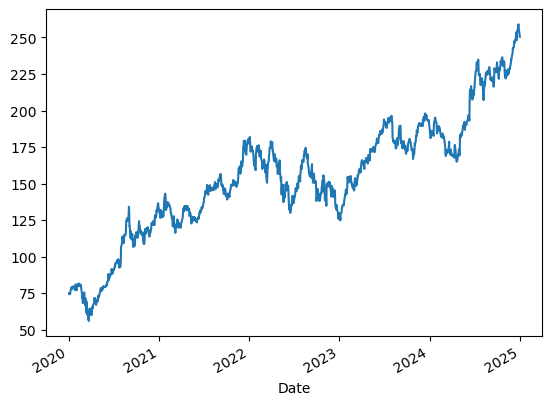

In [7]:
df.Close.plot()

#### » Convert the DataFrame index to string type for compatibility with heatmap axes, drop the 'Volume' column since it is not needed and then create a heatmap to visualize the remaining data

<Axes: xlabel='Price', ylabel='Date'>

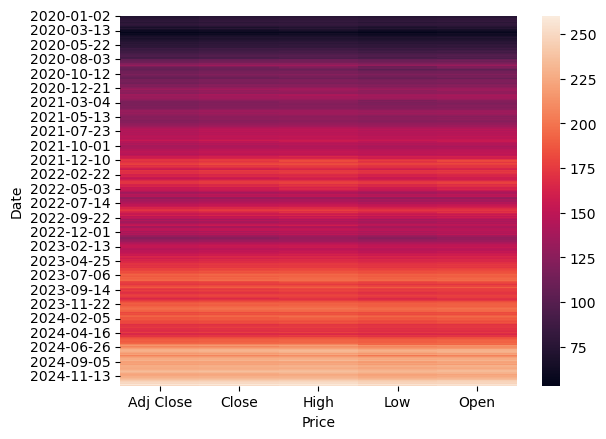

In [8]:
df.index = df.index.astype("str")
df.drop("Volume", axis=1, inplace=True)
import seaborn as sns
sns.heatmap(df)

#### » Transpose the DataFrame so that rows become columns and columns become rows, then plot a heatmap to visualize the data from this new orientation

<Axes: xlabel='Date', ylabel='Price'>

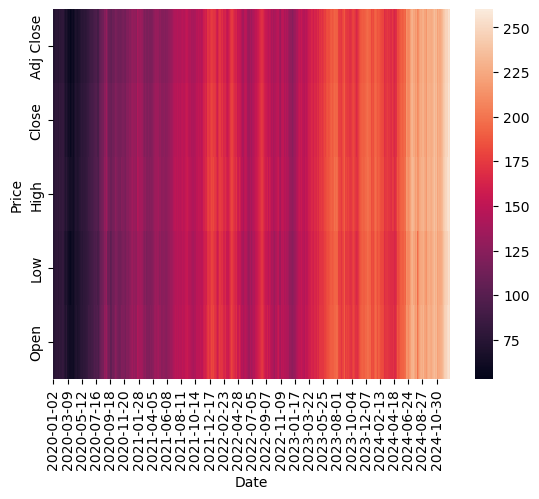

In [9]:
df = df.transpose()
sns.heatmap(df)